In [230]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline  
plt.rcParams["figure.figsize"] = (20 , 10)

In [1]:
%pip install flask

     ------------------------------------ 101.5/101.5 kB 829.4 kB/s eta 0:00:00
     ------------------------------------ 232.7/232.7 kB 458.7 kB/s eta 0:00:00
     -------------------------------------- 96.6/96.6 kB 918.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [231]:
df1 = pd.read_csv("bengaluru_house_prices.csv")

df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [232]:
df1.shape

(13320, 9)

In [233]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [234]:
df2 = df1.drop(['area_type' , 'society' , 'balcony' , 'availability'] , axis = 'columns')

df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [235]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

**AS NUMBER OF NA IS LESS COMPARED TO NUMBER OF ROWS OF DATASET Safely Drop Them**

In [236]:
df3 = df2.dropna()

df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [237]:
df3.shape

(13246, 5)

Overhere it can be seend BHK and Bedroom terms r used so we can just take the integer part by splitting that column

In [238]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [239]:
df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))

C:\Users\ateet\AppData\Local\Temp\ipykernel_29140\3847263516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))


In [240]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [241]:
df3[df3.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [242]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

**Notice in above output some square feet are not in float value but a range 1133-1384 for such records we can take mean of range and replace it with it**

The below function tries and convert to float else it returns false

In [243]:
def is_float(x) :
  try :
    float(x)
  except :
    return False   
  return True  

In [244]:
df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [245]:
def convert_sqrft_to_num(x) :
  tokens = x.split('-')
  if len(tokens) == 2 :
    return (float(tokens[0]) + float(tokens[1])) / 2
  try :
    return float(x)
  except :
    return None

In [246]:
convert_sqrft_to_num('2166')

2166.0

In [247]:
convert_sqrft_to_num('2100 - 2050')

2075.0

In [248]:
convert_sqrft_to_num('34.46Sq. Meter')

.copy() means if we edit df4 df3 wont be affected

If **df4 = df3** changes in df4 will happen in df3 also like pass by reference

In [249]:
df4 = df3.copy()

df4['total_sqft'] = df4['total_sqft'].apply(convert_sqrft_to_num)

df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


**Feature Engineering**

In [250]:
df5 = df4.copy()

Find price per square feet

In [251]:
df5['price_per_sqft'] = (df5['price'] * 100000) / df5['total_sqft']

df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


Find out how many unique locations

In [252]:
len(df5.location.unique())

1304

Check out occurence of locations like which ones occur most times

In [253]:
df5.location = df5.location.apply(lambda x : x.strip())

location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)

location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [254]:
len(location_stats[location_stats <= 10])

1052

In [255]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10 

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

For the locations that occur less than 10 times just Term it as Other else due to locations occuring so less number of times it will be a problem for the model

In [256]:
df5.location = df5.location.apply(lambda x : 'other' if x in location_stats_less_than_10 else x)

len(df5.location.unique())

242

In [257]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


**OUTLIER DETECTION AND REMOVAL**

In [258]:
df5[df5.total_sqft / df5.bhk < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


These are clearly errors in data

In [259]:
df5.shape

(13246, 7)

In [260]:
df6 = df5[~(df5.total_sqft / df5.bhk < 300)]
df6.shape

(12502, 7)

In [261]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Minimum price of 267 rs per square feet is too low.... AND the max price of 176470rs is too high and since a generic model will be made thats why such extremes can be removed

In [262]:
#Function to remove outlier from price per square feet
def remove_pps_outliers(df) :
  #This is output dataframe
  df_out = pd.DataFrame()
  
  for key , subdf in df.groupby('location') :
    mean = np.mean(subdf.price_per_sqft)
    sd = np.std(subdf.price_per_sqft)
    
    #reduced_df we remove outlier prices
    reduced_df = subdf[(subdf.price_per_sqft > (mean - sd)) & (subdf.price_per_sqft <= (mean + sd))]
    df_out = pd.concat([df_out , reduced_df] , ignore_index = True)
    
  return df_out

In [263]:
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

In [264]:
df1.shape

(13320, 9)

Comparing the price of 2BHK and 3BHK for same area

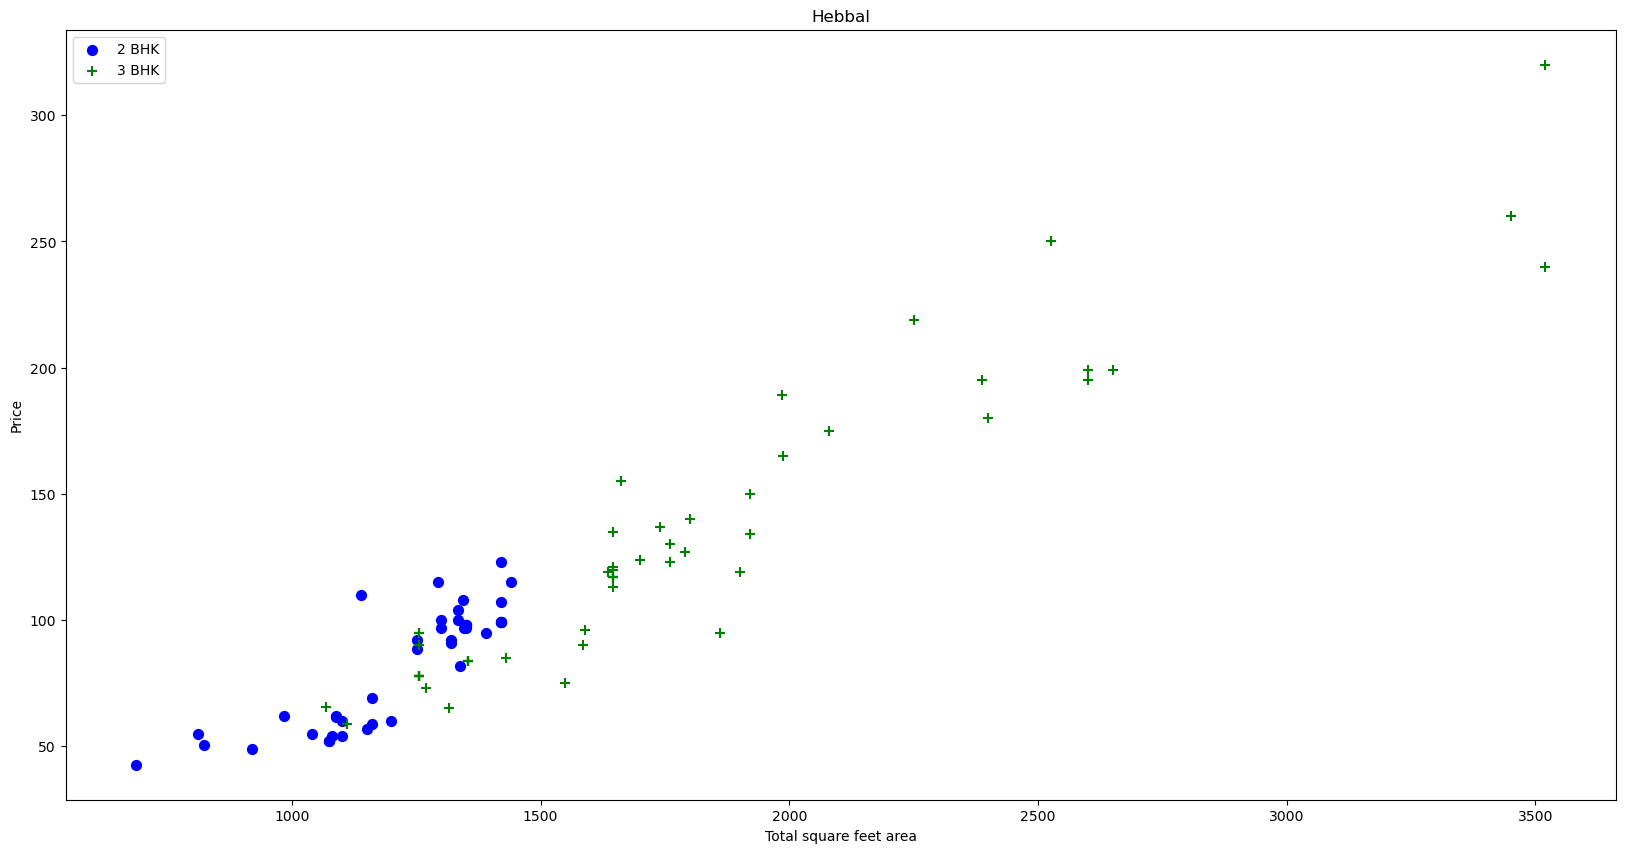

In [265]:
def plot_scatter_chart(df , location) : 
  bhk2 = df[(df.location == location) & (df.bhk == 2)]
  bhk3 = df[(df.location == location) & (df.bhk == 3)]
  
  plt.scatter(bhk2.total_sqft , bhk2.price , color = 'blue' , label = '2 BHK' , s = 50)
  plt.scatter(bhk3.total_sqft , bhk3.price , marker = '+' ,color = 'green' , label = '3 BHK' , s = 50)
  
  plt.xlabel('Total square feet area')
  plt.ylabel('Price')
  plt.title(location)
  plt.legend()
  
plot_scatter_chart(df7 , 'Hebbal')  

From the above graph we can see for same square foot area price of 2BHK > price of 3BHK

We can drop pirces of 2BHK appartments whose price per sqr feet less than mean price per sqr feet of 1 BHK and so on....

In [266]:
def remove_bhk_outliers(df) :
  #Will contain list of rows to remove
  exclude_indices = np.array([])
  for location , location_df in df.groupby('location') :
    bhk_stats = {}
    #Dictionary with stats for each bhk type i.e 1 2 ...
    #It will contain mean price per sq ft , std of price per sqr ft , number of occurences of the particular bhk
    for bhk , bhk_df in location_df.groupby('bhk') :
      bhk_stats[bhk] = {
        'mean' : np.mean(bhk_df.price_per_sqft) ,
        'std' : np.std(bhk_df.price_per_sqft) ,
        'count' : bhk_df.shape[0]
      }

    #stats will contain statistics of the previous lower bhk example if we consider 2 bhk stats will contain data of 1 bhk and if we consider 3 bhk stats will contain data of 2 bhk and so on      
    
    #If a particular bhk has lesser price per sqr ft than mean the price per sqr ft of bhk one less than it i.e a 3bhk having lesser price per sqr ft than the mean price per sqr ft of all 2bhk drop it by appending its index in exclude indices
    
    for bhk, bhk_df in location_df.groupby('bhk') :
      stats = bhk_stats.get(bhk - 1)
      if stats and stats['count'] > 5 :
        exclude_indices = np.append(exclude_indices , bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)

  #drop all exclude index rows and return the df
  return df.drop(exclude_indices , axis = 'index')       

df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

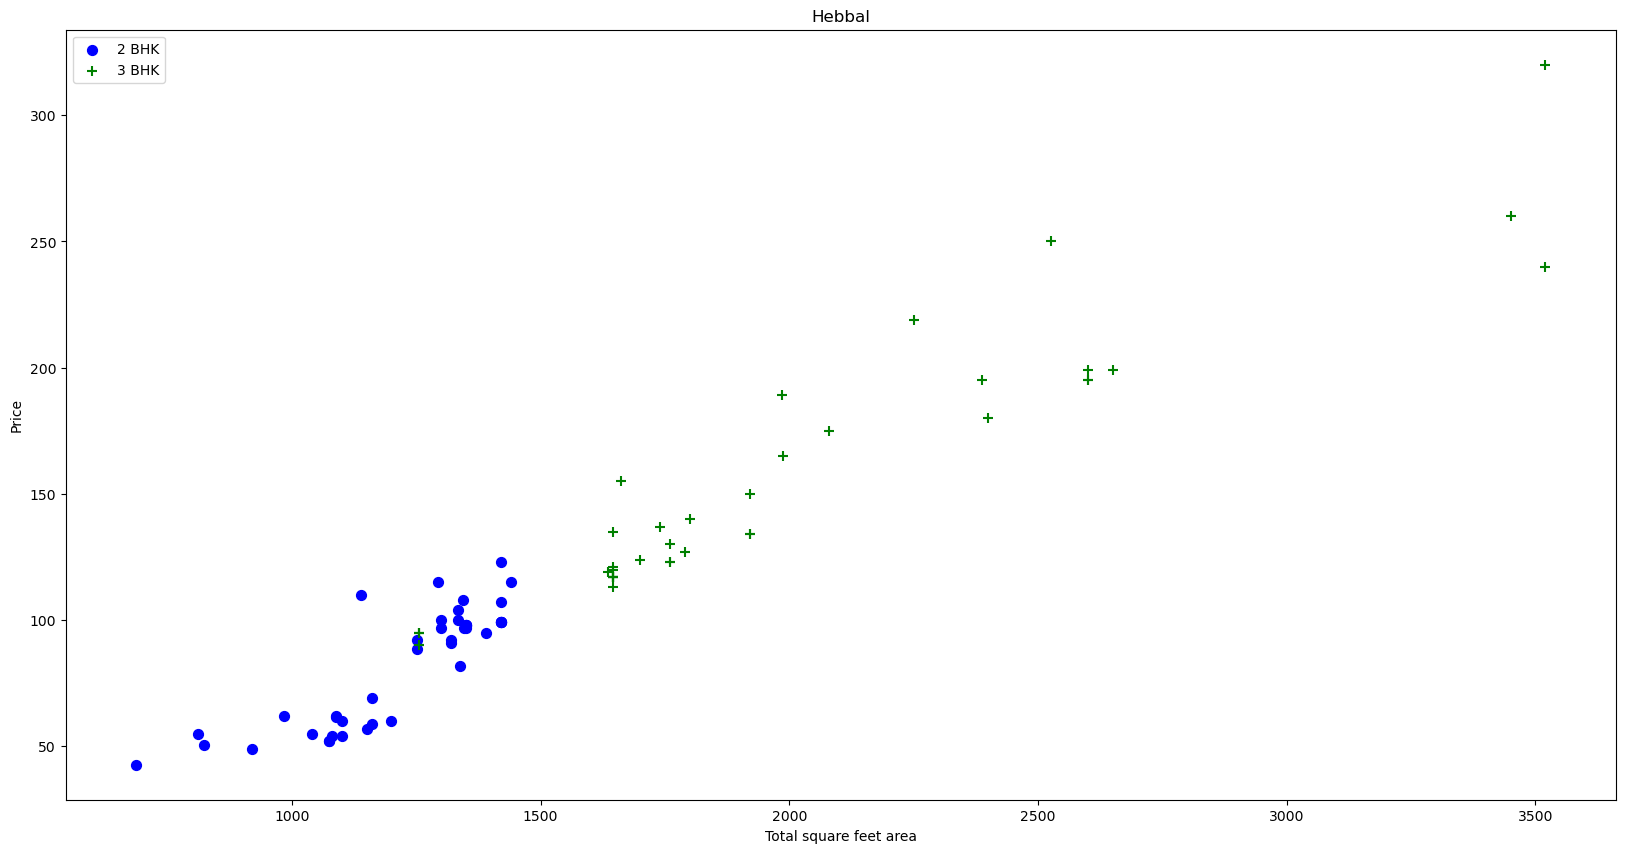

In [267]:
plot_scatter_chart(df8 , 'Hebbal')  

Text(0, 0.5, 'Count')

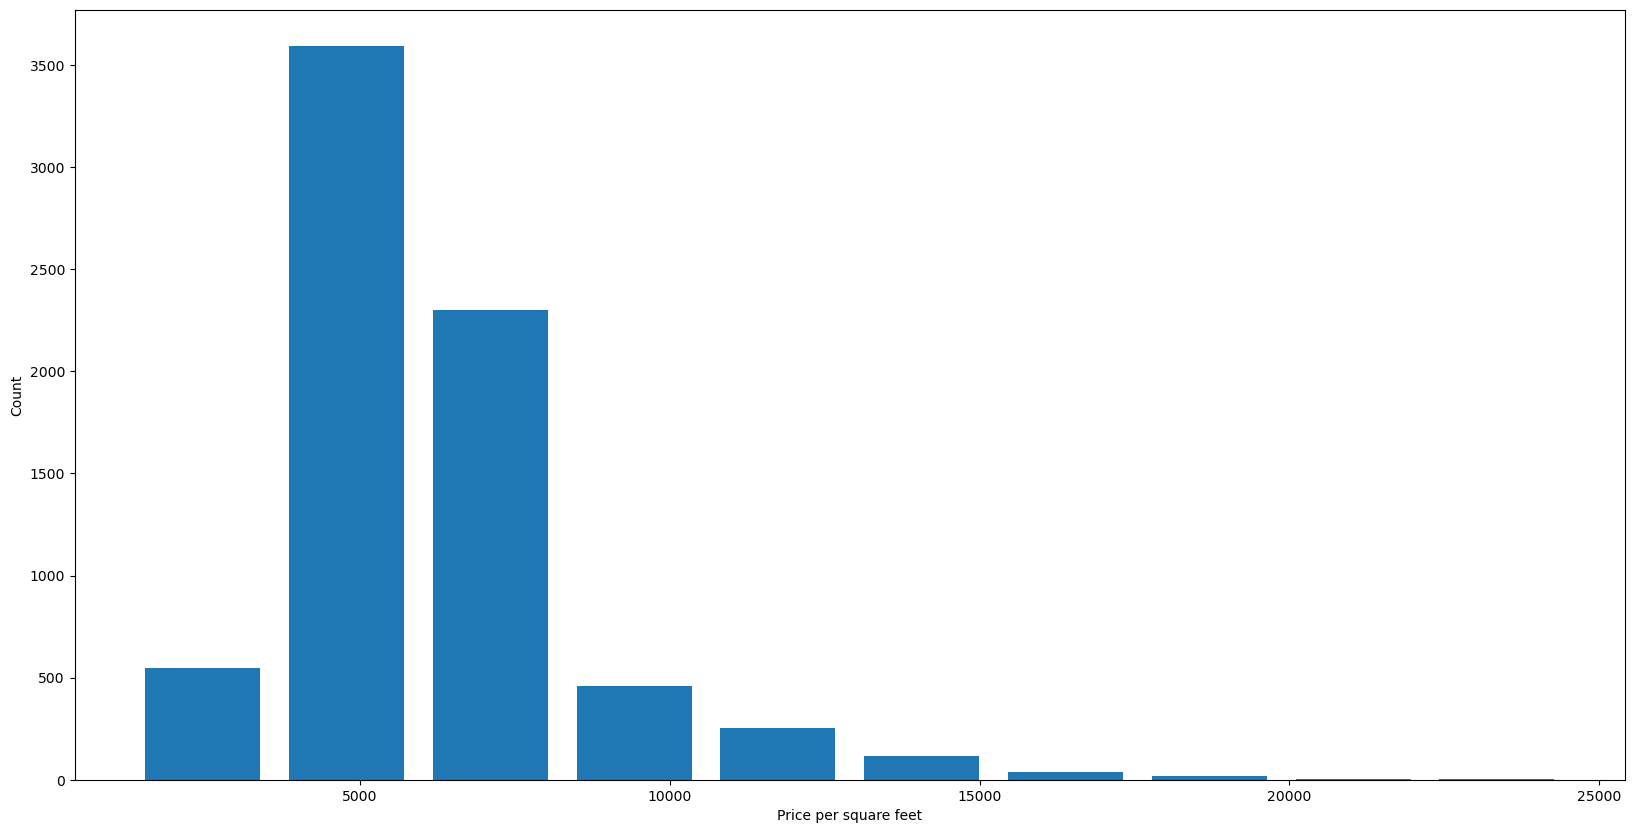

In [268]:
plt.hist(df8.price_per_sqft , rwidth = 0.8)
plt.xlabel('Price per square feet')
plt.ylabel("Count")

Like a normal distribution i.e bell curve

In [269]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [270]:
df8[df8.bath == 16]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.0


Text(0, 0.5, 'Count')

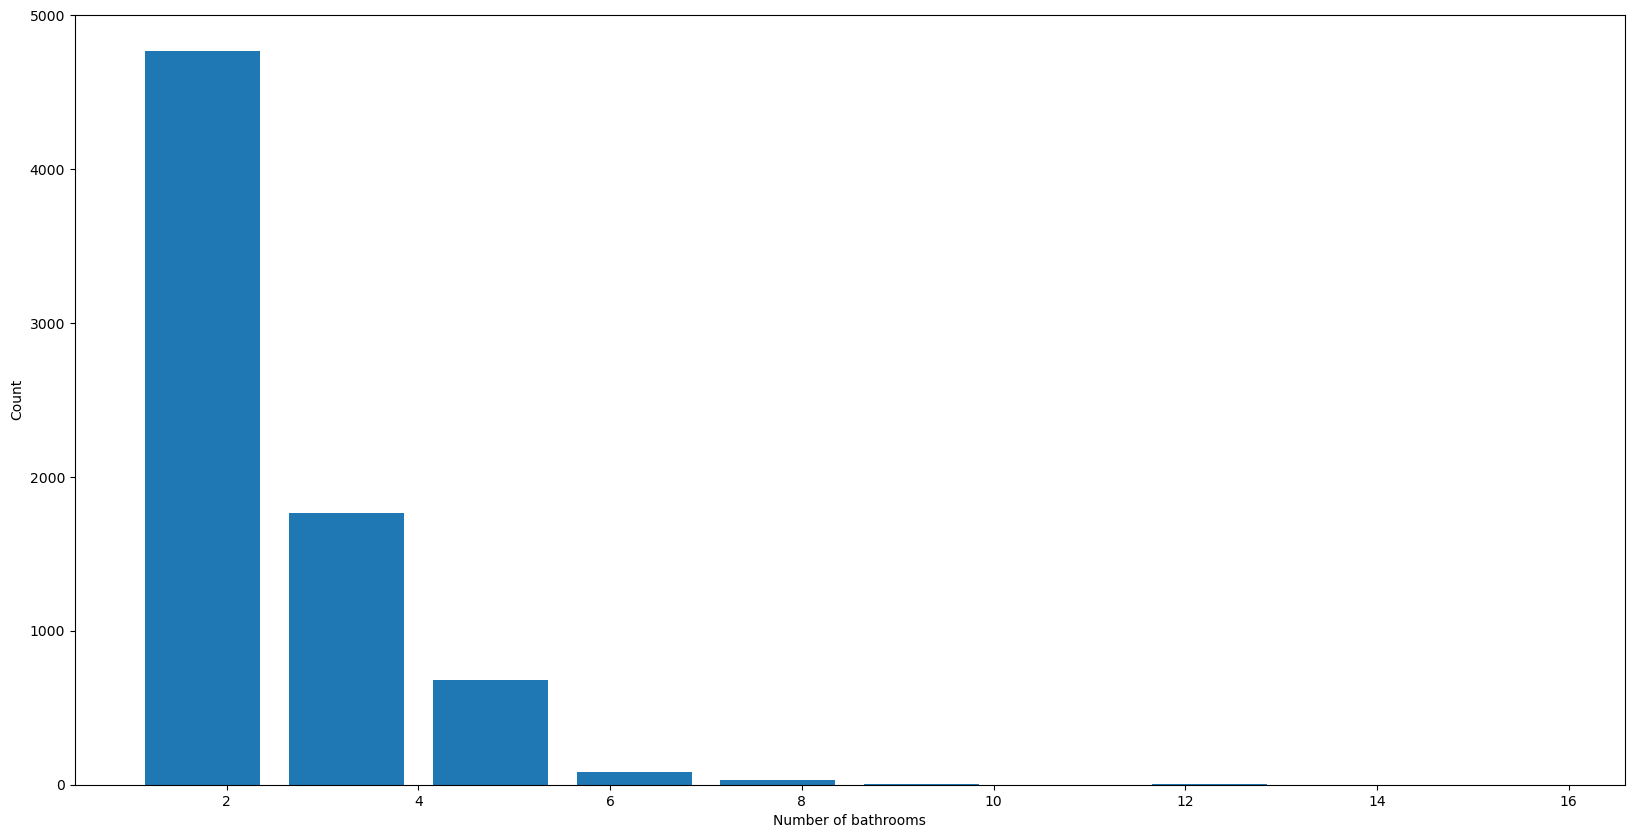

In [271]:
plt.hist(df8.bath , rwidth = 0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

Check for house in which bathroom is more than 2 the number of bedrooms they can be outliers

In [272]:
df8[df8.bath > df8.bhk + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [273]:
df9 = df8[df8.bath < df8.bhk + 2]
df9.shape

(7251, 7)

In [274]:
df10 = df9.drop(['size' , 'price_per_sqft'] , axis = 'columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


**MODEL BUILDING**

One hot encoding is to be used on Location column

In [275]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Concstenate dataframe and dummies column .. Last column of dummies is dropped in order to avoid the dummy variable trap. If location of last column is to be represented all other columns can be made 0

In [276]:
df11 = pd.concat([df10 , dummies.drop('other' , axis = 'columns')] , axis = 'columns')
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Drop the location column as all locations have been One hot encoded and concatenated with the dataframe, now the location column is not needed

In [277]:
df12 = df11.drop('location' , axis = 'columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [278]:
df12.shape

(7251, 245)

X has independent variables , y has the target i.e price

In [279]:
X = df12.drop('price' , axis = 'columns')
y = df12.price

In [280]:
X.shape

(7251, 244)

Train Test split

In [281]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 10)

1. Linear Regression

In [282]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train , y_train)
lr_clf.score(X_test , y_test)

0.8452277697874312

Attempt **Cross-validation** 

**Shuffle split** randomizes the train and test in such a way that the fold will have a normal distribution according to data i.e the fold wont be targeted to maybe a single type of observation

In [283]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5 , test_size = 0.2 , random_state = 0)

cross_val_score(LinearRegression() , X , y , cv = cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

Use variety of models using FridSearchCV

In [288]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X , y) : 
  algos = {
    'linear_regression' : {
      'model' : LinearRegression() ,
      'params' : {
        'normalize' : [True , False]
      }
    } , 
    'lasso' : {
      'model' : Lasso() ,
      'params' : {
        'alpha' : [1 , 2] , 
        'selection' : ['random' , 'cyclic']
      }
    } ,
    'decision_tree' : {
      'model' : DecisionTreeRegressor() ,
      'params' : {
        'criterion' : ['mse' , 'friedman_mse'] ,
        'splitter' : ['best' , 'random']
      }
    }
  }
  
  scores = []
  cv = ShuffleSplit(n_splits = 5 , test_size = 0.2 , random_state = 0)
  for algo_name , config in algos.items() :
    gs = GridSearchCV(config['model'] , config['params'] , cv = cv , return_train_score = False)
    gs.fit(X , y)
    scores.append({
      'model' : algo_name ,
      'best_score' : gs.best_score_ ,
      'best_params' : gs.best_params_
    })
    
  return pd.DataFrame(scores , columns = ['model' , 'best_score' , 'best_params'])

In [289]:
find_best_model_using_gridsearchcv(X , y)

c:\Users\ateet\miniconda3\envs\minimal_ds\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\ateet\miniconda3\envs\minimal_ds\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipe

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': True}
1,lasso,0.687429,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.723923,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In this case **linear regression** gives the best prediction

In [290]:
def predict_price(location , sqft , bath , bhk) :
  #After one hot encoding many columns are there of location . This will return the index of the column which location we have provided
  loc_index = np.where(X.columns == location)[0][0]
  
  x = np.zeros(len(X.columns))
  x[0] = sqft
  x[1] = bath
  x[2] = bhk
  
  #Mark that column with same location as provided as 1
  if loc_index >= 0 : 
    x[loc_index] = 1
    
  return lr_clf.predict([x])[0]

In [291]:
predict_price('1st Phase JP Nagar' , 1000 , 2 , 2)

c:\Users\ateet\miniconda3\envs\minimal_ds\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677179237

In [292]:
predict_price('1st Phase JP Nagar' , 1000 , 3 , 3)

c:\Users\ateet\miniconda3\envs\minimal_ds\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.80519395205847

In [293]:
predict_price('Indira Nagar' , 1000 , 2 , 2)

c:\Users\ateet\miniconda3\envs\minimal_ds\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.2781548400685

In [294]:
predict_price('Indira Nagar' , 1000 , 3 , 3)

c:\Users\ateet\miniconda3\envs\minimal_ds\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184.58430202033463

In [295]:
import pickle
with open('bangalore_home_prices_model.pickle' , 'wb') as f :
  pickle.dump(lr_clf , f)

In [ ]:
import json
columns = {
  'data_columns' :  [col.lower() for col in X.columns]
}
with open("columns.json" , "w") as f :
  f.write(json.dumps(columns))